In [103]:
import pandas as pd
import numpy as np
import torch
import torchvision

import os,sys
import glob
from PIL import Image

from matplotlib.pyplot import imshow
from skimage import transform

In [2]:
train_df = pd.read_json("data/original/train.json")

In [5]:
train_df[train_df['listing_id'] == 6812234]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
115189,1.0,1,0,2016-04-02 01:20:46,"Building features a DOORMAN, ELEVATOR, LAUNDRY...",East 77th Street,"[Doorman, No Fee, Dogs Allowed, Cats Allowed]",low,40.7698,6812234,-73.9512,9fb89dd6389267ed37abbd8d78efcd6f,[https://photos.renthop.com/2/6812234_03ffaf02...,3495,500 East 77th Street


In [14]:
image_temp = Image.open("images_sample/6811957/6811957_33d08c8dc440c89bccc8d9889c5485a6.jpg")

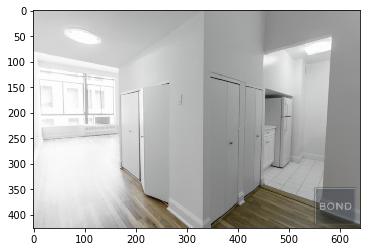

In [27]:
%matplotlib inline
imshow(np.asarray(image_temp))

In [29]:
image_matrix = np.asarray(image_temp)

In [38]:
print [name for name in os.listdir("./images_sample")]

['.DS_Store', '6811957', '6811958', '6811960', '6811964', '6811965', '6811966', '6811971', '6811973', '6811974', '6811975', '6811983', '6811984', '6811985', '6811988', '6811990', '6811992', '6811995', '6811997', '6812000', '6812002', '6812004', '6812005', '6812009', '6812012', '6812016', '6812025', '6812032', '6812033', '6812035', '6812041', '6812045', '6812048', '6812049', '6812050', '6812051', '6812052', '6812054', '6812061', '6812062', '6812063', '6812064', '6812077', '6812082', '6812083', '6812086', '6812091', '6812098', '6812103', '6812106', '6812107', '6812112', '6812113', '6812119', '6812120', '6812122', '6812126', '6812127', '6812133', '6812135', '6812140', '6812141', '6812142', '6812143', '6812150', '6812151', '6812153', '6812154', '6812157', '6812158', '6812160', '6812162', '6812174', '6812175', '6812177', '6812178', '6812179', '6812181', '6812186', '6812187', '6812190', '6812192', '6812195', '6812198', '6812201', '6812208', '6812210', '6812215', '6812216', '6812223', '681223

In [40]:
os.path.isdir("./images_sample/.DS_Store")

False

In [49]:
pic_folder_list = [name for name in os.listdir("./images_sample") if os.path.isdir(os.path.join('./images_sample/', name))]

In [68]:
pic_dict = dict()
for pic_folder in pic_folder_list:
    pic_dict[pic_folder] = dict()
    
    relative_path = os.path.join('./images_sample/', pic_folder)
    pic_name_list = glob.glob(relative_path + '/*.jpg')
    
    for pic in pic_name_list:
        pic_dict[pic_folder][pic] = Image.open(pic)

In [115]:
size_list = []
image_list = []
for folder_name, folder_dic in pic_dict.items():
    for image_name, image in pic_dict[folder_name].items():
        size_list.append(list(image.size))
        image_list.append(image)

In [116]:
np.where(np.array(size_list)[:, 0] < 200)

(array([118, 315]),)

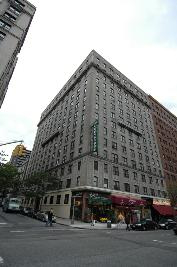

In [118]:
image_list[118]

In [93]:
image_matrix = np.array(image)

In [122]:
temp_2 = transform.resize(np.array(image_list[118]), [480, 640])

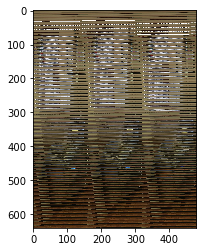

In [130]:
imshow(image_matrix.reshape((640, 480, 3)))

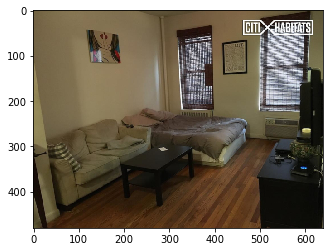

In [132]:
imshow(image_matrix)